In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, GRU, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
# Charger les données
df = pd.read_csv("resultat.csv",sep=";")  # Remplacez par le chemin de vos données
df = df.dropna(subset=['Commentaire'])
# Vérifier les valeurs manquantes dans la colonne 'Commentaire'
df['Commentaire'].isnull().sum()
df['Commentaire'] = df['Commentaire'].str.lower()

# Supprimer les doublons
df = df.drop_duplicates(subset='Commentaire', keep='first')
import re
# Définir une fonction pour supprimer les émojis
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["  # Range of emojis in Unicode
        "\U0001F600-\U0001F64F"  # Emoticônes (Smileys)
        "\U0001F300-\U0001F5FF"  # Symboles et pictogrammes
        "\U0001F680-\U0001F6FF"  # Transport et symboles divers
        "\U0001F700-\U0001F77F"  # Symboles supplémentaires
        "\U0001F780-\U0001F7FF"  # Supp. Geometric Shapes Extended
        "\U0001F800-\U0001F8FF"  # Supp. Arrows-C, Extended-C
        "\U0001F900-\U0001F9FF"  # Supp. Arrows-D, Objects
        "\U0001FA00-\U0001FA6F"  # Chess, symbols, new emojis
        "\U0001FA70-\U0001FAFF"  # Symbols and pictograms extended
        "\U00002702-\U000027B0"  # Divers symboles et pictogrammes
        "\U000024C2-\U0001F251"  # Autres symboles divers
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)  # Remplacer par une chaîne vide

# Appliquer la fonction à la colonne 'Commentaire'
df['Commentaire'] = df['Commentaire'].apply(remove_emojis)
# Vérifier les chaînes vides ou contenant uniquement des espaces dans la colonne 'Commentaire'
empty_strings = df['Commentaire'].str.strip() == ''  # 'strip()' supprime les espaces avant et après
num_empty_strings = (df['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides avant : {num_empty_strings}")

# Afficher les lignes avec des chaînes vides
print("les lignes vides",df[empty_strings])
# Supprimer les lignes où 'Commentaire' est vide ou uniquement composé d'espaces
df_cleaned = df[df['Commentaire'].str.strip() != '']

num_empty_strings = (df_cleaned['Commentaire'].str.strip() == '').sum()
print(f"Nombre de chaînes vides apres : {num_empty_strings}")
print(df_cleaned.shape)

df_cleaned=df_cleaned.reset_index(drop=True)
import matplotlib.pyplot as plt
def assign_label(note):
    if note == 1:
        return 'Négatif'
    elif note == 2:
        return 'Neutre'
    else:
        return 'Positif'
df_cleaned['Label'] = df_cleaned['Note'].apply(assign_label)
df_final = pd.read_csv("final_balanced_reviews_with_duplication.csv",sep=";") 
X = df_final['Commentaire']
y = df_final['Label']


Nombre de chaînes vides avant : 70
les lignes vides       Note Commentaire
24       5            
68       3            
120      4            
124      4            
125      4            
...    ...         ...
4574     1            
4582     1            
4585     1            
4592     1            
4696     2            

[70 rows x 2 columns]
Nombre de chaînes vides apres : 0
(1654, 2)


--- Random Forest ---
Precision: 0.9453, Recall: 0.9359, F1-Score: 0.9354, Accuracy: 0.9359


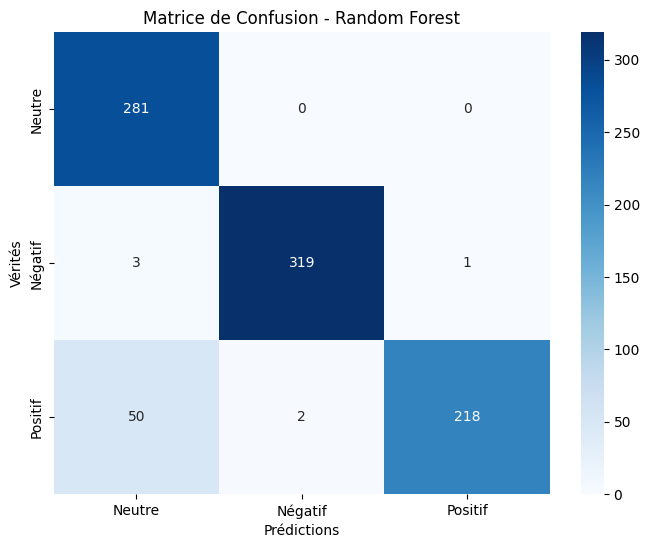

--- Support Vector Machine ---
Precision: 0.9421, Recall: 0.9382, F1-Score: 0.9376, Accuracy: 0.9382


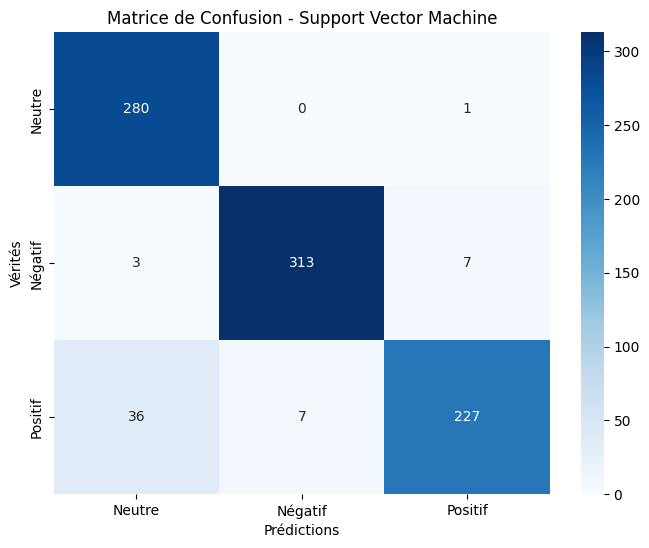

--- Decision Tree ---
Precision: 0.9313, Recall: 0.9165, F1-Score: 0.9155, Accuracy: 0.9165


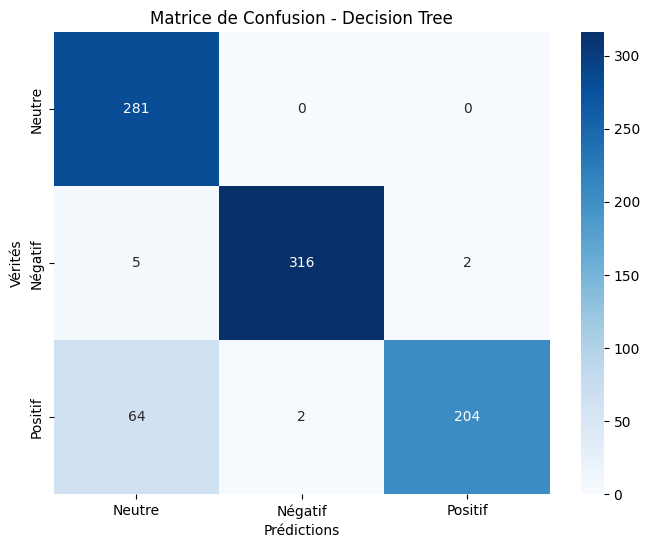

--- Logistic Regression ---
Precision: 0.9529, Recall: 0.9519, F1-Score: 0.9522, Accuracy: 0.9519


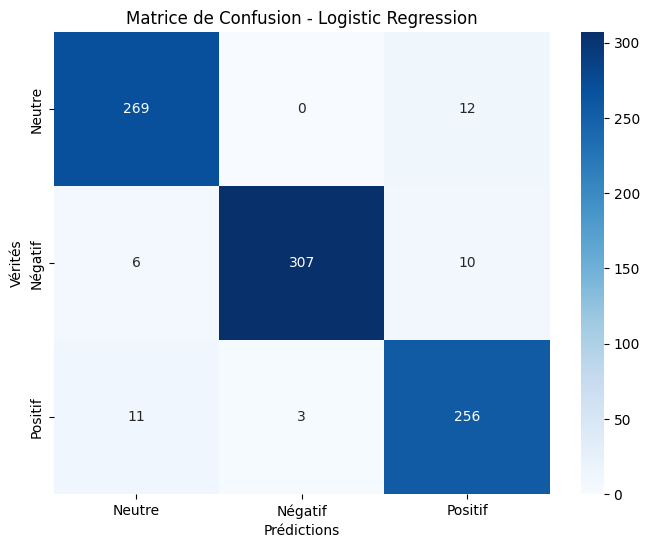

c:\Users\lenevo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


--- AdaBoost ---
Precision: 0.7612, Recall: 0.7059, F1-Score: 0.6796, Accuracy: 0.7059


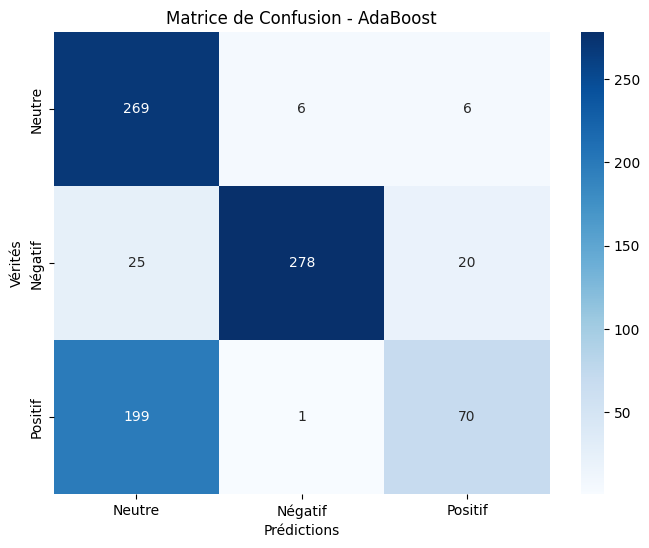

--- Naive Bayes ---
Precision: 0.9172, Recall: 0.9176, F1-Score: 0.9171, Accuracy: 0.9176


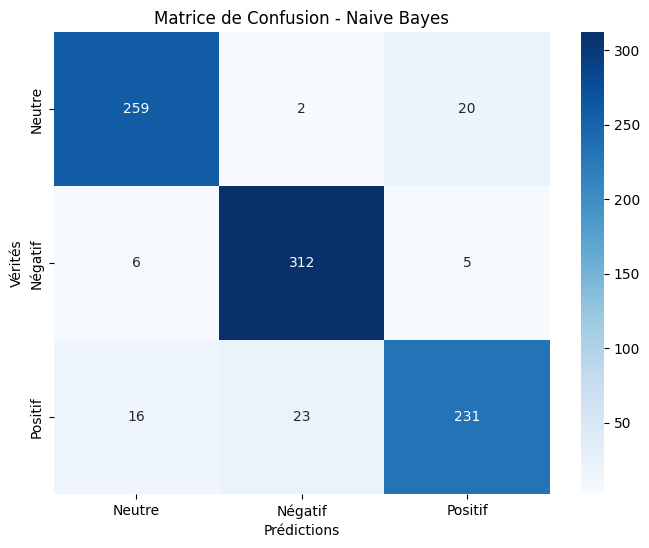


Résumé des résultats :
Random Forest: Precision=0.9453, Recall=0.9359, F1-Score=0.9354, Accuracy=0.9359
SVM: Precision=0.9421, Recall=0.9382, F1-Score=0.9376, Accuracy=0.9382
Decision Tree: Precision=0.9313, Recall=0.9165, F1-Score=0.9155, Accuracy=0.9165
Logistic Regression: Precision=0.9529, Recall=0.9519, F1-Score=0.9522, Accuracy=0.9519
AdaBoost: Precision=0.7612, Recall=0.7059, F1-Score=0.6796, Accuracy=0.7059
Naive Bayes: Precision=0.9172, Recall=0.9176, F1-Score=0.9171, Accuracy=0.9176

Résumé des résultats :
Random Forest: Precision=0.9453, Recall=0.9359, F1-Score=0.9354, Accuracy=0.9359
SVM: Precision=0.9421, Recall=0.9382, F1-Score=0.9376, Accuracy=0.9382
Decision Tree: Precision=0.9313, Recall=0.9165, F1-Score=0.9155, Accuracy=0.9165
Logistic Regression: Precision=0.9529, Recall=0.9519, F1-Score=0.9522, Accuracy=0.9519
AdaBoost: Precision=0.7612, Recall=0.7059, F1-Score=0.6796, Accuracy=0.7059
Naive Bayes: Precision=0.9172, Recall=0.9176, F1-Score=0.9171, Accuracy=0.9176


In [8]:
# Séparation des données en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Encoder les labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
# Vectorisation des textes avec TF-IDF pour les algorithmes classiques
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_test, y_pred, model_name, labels):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title(f"Matrice de Confusion - {model_name}")
    plt.xlabel("Prédictions")
    plt.ylabel("Vérités")
    plt.show()

# Fonction pour évaluer les modèles
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {model_name} ---")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")
    plot_confusion_matrix(y_test, y_pred, model_name, labels=label_encoder.classes_)
    
    return precision, recall, f1, accuracy

# Initialisation d'un dictionnaire pour sauvegarder les résultats
results = {}

# 1. Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
results['Random Forest'] = evaluate_model(rf, X_test_tfidf, y_test, "Random Forest")

# 2. Support Vector Machine
svm = SVC()
svm.fit(X_train_tfidf, y_train)
results['SVM'] = evaluate_model(svm, X_test_tfidf, y_test, "Support Vector Machine")

# 3. Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_tfidf, y_train)
results['Decision Tree'] = evaluate_model(dt, X_test_tfidf, y_test, "Decision Tree")

# 4. Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
results['Logistic Regression'] = evaluate_model(lr, X_test_tfidf, y_test, "Logistic Regression")

# 5. AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train_tfidf, y_train)
results['AdaBoost'] = evaluate_model(ada, X_test_tfidf, y_test, "AdaBoost")
from sklearn.naive_bayes import MultinomialNB

# 6. Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)
results['Naive Bayes'] = evaluate_model(nb, X_test_tfidf, y_test, "Naive Bayes")

# Résumé des résultats
print("\nRésumé des résultats :")
for model, scores in results.items():
      print(f"{model}: Precision={scores[0]:.4f}, Recall={scores[1]:.4f}, F1-Score={scores[2]:.4f}, Accuracy={scores[3]:.4f}")


# Résumé des résultats
print("\nRésumé des résultats :")
for model, scores in results.items():
      print(f"{model}: Precision={scores[0]:.4f}, Recall={scores[1]:.4f}, F1-Score={scores[2]:.4f}, Accuracy={scores[3]:.4f}")